In [24]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [44]:
dir = "./data/DopantUptake/DopantUptake/Data"
samples = [os.path.join(dir, sample) for sample in os.listdir(dir)]


sample_dfs = {}
for sample in samples:
    sample_name = os.path.basename(sample).split('.')[0]
    sample_dfs[sample_name] = pd.read_csv(sample, sep='\t', skiprows=1, na_values=["Failed"])

def sorter(item):
    if item[0].startswith('Sample'):
        return int(item[0].split(' ')[-1])
    else: return 0

sample_dfs = dict( sorted(sample_dfs.items(), key=sorter) )

In [45]:
sample_dfs.keys()

dict_keys(['Reference_bare sensor 1', 'Reference_bare sensor 2', 'Reference_bare sensor 3', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 12', 'Sample 15', 'Sample 21', 'Sample 22', 'Sample 23', 'Sample 24', 'Sample 39', 'Sample 50', 'Sample 53', 'Sample 58', 'Sample 61', 'Sample 80', 'Sample 81'])

In [46]:
sample_dfs['Sample 12']

,Time [s],R2_m9 [ng/cm^2],C1_m [ng/cm^2]
0,0.0000,NaN,NaN
1,1.3259,NaN,NaN
2,2.6424,NaN,NaN
3,3.9720,NaN,NaN
4,5.3007,NaN,NaN
...,...,...,...
4395,1764.2580,749.44,749.82
4396,1764.6506,754.17,751.57
4397,1765.0690,752.55,749.63
4398,1765.5342,751.58,750.93


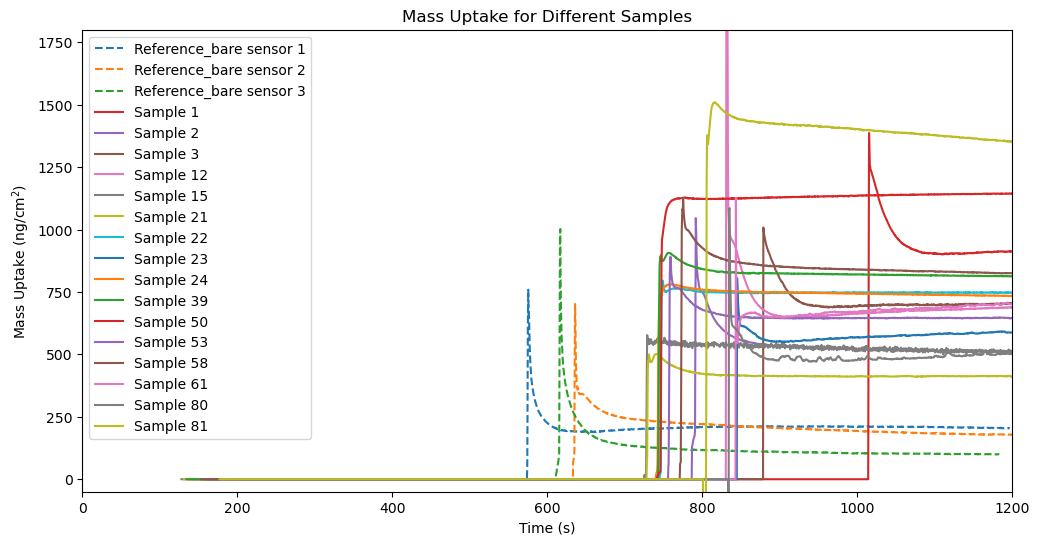

In [47]:
plt.figure(figsize=(12, 6))
plt.title('Mass Uptake for Different Samples')
plt.xlabel('Time (s)')
plt.ylabel('Mass Uptake (ng/cm$^2$)')

for sample_name in sample_dfs:
    if sample_name.startswith('Sample'): linestyle = '-'
    else: linestyle = '--'
    t = sample_dfs[sample_name]['Time [s]']
    m = sample_dfs[sample_name]['C1_m [ng/cm^2]']
    plt.plot(t, m, label=sample_name, linestyle=linestyle)


plt.xlim(0, 1200)
plt.ylim(-50, 1800)
plt.legend()